In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import MDAnalysis as mda 
import matplotlib.pyplot as plt
from MDAnalysis.analysis import align

import useful_functions
import residue 
import config
import __init__

aminoacid_ensemble = []

for aminoacid in config.aminoacids:
    aminoacid_ensemble.append(residue.Residue(aminoacid, config.len_aminoacids[aminoacid], config.source, config.conformations, config.output, config.threshold))




In [14]:
import requests
import os
from tqdm import tqdm  # For progress visualization

# Directory to save the downloaded PDB files
os.makedirs("pdb_structures", exist_ok=True)

# RCSB API search endpoint
query_url = "https://search.rcsb.org/rcsbsearch/v2/query"

# Search criteria: Resolution ≤ 1.8Å, Year 2010–2020, X-ray crystallography
query = {
    "query": {
        "type": "group",
        "logical_operator": "and",
        "nodes": [
            {
                "type": "terminal",
                "service": "text",
                "parameters": {
                    "attribute": "rcsb_entry_info.resolution_combined",
                    "operator": "less_or_equal",
                    "value": "1.8"  # Precision criteria
                }
            },
            {
                "type": "terminal",
                "service": "text",
                "parameters": {
                    "attribute": "rcsb_accession_info.initial_release_date",
                    "operator": "between",
                    "value": ["2010-01-01", "2020-12-31"]
                }
            },
            {
                "type": "terminal",
                "service": "text",
                "parameters": {
                    "attribute": "exptl.method",
                    "operator": "exact_match",
                    "value": "X-RAY DIFFRACTION"
                }
            }
        ]
    },
    "return_type": "entry"
}

# Request to fetch matching PDB IDs
headers = {"Content-Type": "application/json"}
response = requests.post(query_url, json=query, headers=headers)

if response.status_code == 200:
    pdb_ids = response.json().get("result_set", [])
    print(f"Found {len(pdb_ids)} structures.")

    # Download each PDB file
    base_url = "https://files.rcsb.org/download/{}.pdb"
    for entry in tqdm(pdb_ids, desc="Downloading PDB files"):
        pdb_id = entry["identifier"]
        pdb_data = requests.get(base_url.format(pdb_id))
        
        with open(f"pdb_structures/{pdb_id}.pdb", "wb") as file:
            file.write(pdb_data.content)

    print("Download completed successfully!")
else:
    print(f"Failed to fetch data from RCSB PDB API. Error details:\n{response.text}")

Failed to fetch data from RCSB PDB API. Error details:
{
  "status" : 400,
  "message" : "JSON schema validation failed for query: {\"query\":{\"type\":\"group\",\"logical_operator\":\"and\",\"nodes\":[{\"type\":\"terminal\",\"service\":\"text\",\"parameters\":{\"attribute\":\"rcsb_entry_info.resolution_combined\",\"operator\":\"less_or_equal\",\"value\":\"1.8\"}},{\"type\":\"terminal\",\"service\":\"text\",\"parameters\":{\"attribute\":\"rcsb_accession_info.initial_release_date\",\"operator\":\"between\",\"value\":[\"2010-01-01\",\"2020-12-31\"]}},{\"type\":\"terminal\",\"service\":\"text\",\"parameters\":{\"attribute\":\"exptl.method\",\"operator\":\"exact_match\",\"value\":\"X-RAY DIFFRACTION\"}}]},\"return_type\":\"entry\",\"request_info\":{\"query_id\":\"216902cf-7046-4291-835a-f3c44a36201c\"},\"request_options\":{\"sort\":[{\"sort_by\":\"score\",\"direction\":\"desc\"}],\"paginate\":{\"start\":0,\"rows\":10},\"scoring_strategy\":\"combined\"}}. Errors: instance failed to match ex

In [5]:
while True:
    analized_prote  = input("quin fitxer de proteïna vols analitzar? Escriu break per parar")
    if analized_prote == "break":
        break
    u = mda.Universe(config.source_2+"/"+analized_prote)
    for i in range(len(aminoacid_ensemble)):
        aminoacid_ensemble[i].add_universe(u, analized_prote, verbose = True)

quin fitxer de proteïna vols analitzar? Escriu break per parar 2g0d.pdb


Aminoacid: 
Name='ALA' 
Number of atoms in residue= '5' 
Number of conformations found='7'
Total of conformations analyzed='18'
RMSD Threshhold used= '0.223606797749979'
 
Aminoacid: 
Name='ARG' 
Number of atoms in residue= '11' 
Number of conformations found='549'
Total of conformations analyzed='12'
RMSD Threshhold used= '0.33166247903554'
 
Aminoacid: 
Name='ASN' 
Number of atoms in residue= '8' 
Number of conformations found='94'
Total of conformations analyzed='22'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='ASP' 
Number of atoms in residue= '8' 
Number of conformations found='111'
Total of conformations analyzed='23'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='CYS' 
Number of atoms in residue= '6' 
Number of conformations found='22'
Total of conformations analyzed='6'
RMSD Threshhold used= '0.2449489742783178'
 
Aminoacid: 
Name='GLN' 
Number of atoms in residue= '9' 
Number of conformations found='208'
Total of conformations analyzed='10'


quin fitxer de proteïna vols analitzar? Escriu break per parar break


In [4]:
print([aminoacid_ensemble[k].conformations for k in range(len(aminoacid_ensemble))])

[[Conformation of 'ALA' with '4701' instances first seen in '6mu9', Conformation of 'ALA' with '1819' instances first seen in '6mu9', Conformation of 'ALA' with '400' instances first seen in '6mu9', Conformation of 'ALA' with '16' instances first seen in '6mu9', Conformation of 'ALA' with '320' instances first seen in '6mu9', Conformation of 'ALA' with '5' instances first seen in '5vfb', Conformation of 'ALA' with '15' instances first seen in '4lgy'], [Conformation of 'ARG' with '63' instances first seen in '6mu9', Conformation of 'ARG' with '21' instances first seen in '6mu9', Conformation of 'ARG' with '31' instances first seen in '6mu9', Conformation of 'ARG' with '23' instances first seen in '6mu9', Conformation of 'ARG' with '42' instances first seen in '6mu9', Conformation of 'ARG' with '15' instances first seen in '6mu9', Conformation of 'ARG' with '26' instances first seen in '6mu9', Conformation of 'ARG' with '62' instances first seen in '6mu9', Conformation of 'ARG' with '8' 

In [2]:
#Per llegir directament totes les dades
for file in os.listdir(config.source+"/"):
    print(file)
    if file.endswith(".pdb"):
        u = mda.Universe(config.source+"/"+file)
        for i in range(len(aminoacid_ensemble)):
            aminoacid_ensemble[i].add_universe(u, os.path.splitext(file)[0],verbose = True)  

6mu9.pdb
Aminoacid: 
Name='ALA' 
Number of atoms in residue= '5' 
Number of conformations found='5'
Total of conformations analyzed='29'
RMSD Threshhold used= '0.223606797749979'
 
Aminoacid: 
Name='ARG' 
Number of atoms in residue= '11' 
Number of conformations found='11'
Total of conformations analyzed='13'
RMSD Threshhold used= '0.33166247903554'
 
Aminoacid: 
Name='ASN' 
Number of atoms in residue= '8' 
Number of conformations found='9'
Total of conformations analyzed='15'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='ASP' 
Number of atoms in residue= '8' 
Number of conformations found='11'
Total of conformations analyzed='24'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='CYS' 
Number of atoms in residue= '6' 
Number of conformations found='0'
Total of conformations analyzed='0'
RMSD Threshhold used= '0.2449489742783178'
 
Aminoacid: 
Name='GLN' 
Number of atoms in residue= '9' 
Number of conformations found='4'
Total of conformations analyzed='7

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


Aminoacid: 
Name='ALA' 
Number of atoms in residue= '5' 
Number of conformations found='7'
Total of conformations analyzed='3235'
RMSD Threshhold used= '0.223606797749979'
 
Aminoacid: 
Name='ARG' 
Number of atoms in residue= '11' 
Number of conformations found='325'
Total of conformations analyzed='1539'
RMSD Threshhold used= '0.33166247903554'
 
Aminoacid: 
Name='ASN' 
Number of atoms in residue= '8' 
Number of conformations found='78'
Total of conformations analyzed='1662'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='ASP' 
Number of atoms in residue= '8' 
Number of conformations found='90'
Total of conformations analyzed='2119'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='CYS' 
Number of atoms in residue= '6' 
Number of conformations found='19'
Total of conformations analyzed='478'
RMSD Threshhold used= '0.2449489742783178'
 
Aminoacid: 
Name='GLN' 
Number of atoms in residue= '9' 
Number of conformations found='143'
Total of conformations analy

In [3]:
print(os.listdir(config.source+"/"))

['6mu9.pdb', '4cnn.pdb', '5vfb.pdb', '4lgy.pdb', '5cec.pdb', '3lez.pdb', '8cm6.pdb', '6t7l.pdb', '3d1k.pdb', '7s4o.pdb', '4hdr.pdb', '6g8k.pdb', '5orf.pdb', '6ooe.pdb', '6c9x.pdb', '5ok6.pdb', '.DS_Store', '4zar.pdb', '4xxr.pdb', '6c7e.pdb', '3ro8.pdb', '3uqy.pdb', '7f82.pdb', '4tvv.pdb', '4ddy.pdb', '4i3g.pdb', '6sba.pdb', '7pcx.pdb', '7ffx.pdb', '2hds.pdb', '3w4o.pdb', '4eqi.pdb', '3e2d.pdb', '6gjf.pdb', '5u00.pdb', '5npz.pdb', '2rtj.pdb', '8zkw.pdb', '8sov.pdb', '3bmx.pdb', '7rxv.pdb', '6unb.pdb', '1yly.pdb', '2eab.pdb', '5njf.pdb', '9mxv.pdb', '3wwx.pdb', '7l1a.pdb', '1mpl.pdb', '7eam.pdb', '6v2p.pdb', '4irl.pdb', '3v39.pdb', '5y0l.pdb', '6tep.pdb', '6dvm.pdb', '6ofq.pdb', '6joz.pdb', '2rta.pdb', '7ddm.pdb', '7vn0.pdb', '7rxx.pdb', '5qqr.pdb', '1ym1.pdb', '1c0p.pdb', '7w3e.pdb', '3g2y.pdb', '5xyq.pdb', '8fum.pdb', '3dt4.pdb', '1ylp.pdb', '4fb2.pdb', '1iki.pdb', '7au1.pdb', '7pul.pdb', '1scw.pdb', '1yt4.pdb', '6r2j.pdb', '1n9b.pdb', '4jvo.pdb', '7c7d.pdb', '8ynv.pdb', '4dwr.pdb', '4

In [6]:
for i in range(len(aminoacid_ensemble)):
    aminoacid_ensemble[i].save()

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:777: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "


In [2]:
for i in range(len(aminoacid_ensemble)):
    aminoacid_ensemble[i].open()

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


In [6]:
while True:
    analized_prote  = input("quin fitxer de proteïna vols analitzar? Escriu break per parar")
    if analized_prote == "break":
        break
    u = mda.Universe(config.source+"/"+analized_prote)
    for i in range(len(aminoacid_ensemble)):
        aminoacid_ensemble[i].add_universe(u, verbose = True)

quin fitxer de proteïna vols analitzar? Escriu break per parar 8zkw_model_0.pdb


Aminoacid: 
Name='ALA' 
Number of atoms in residue= '5' 
Number of conformations found='9'
Total of conformations analyzed='47'
RMSD Threshhold used= '0.223606797749979'
 
Aminoacid: 
Name='ARG' 
Number of atoms in residue= '11' 
Number of conformations found='450'
Total of conformations analyzed='17'
RMSD Threshhold used= '0.33166247903554'
 
Aminoacid: 
Name='ASN' 
Number of atoms in residue= '8' 
Number of conformations found='91'
Total of conformations analyzed='23'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='ASP' 
Number of atoms in residue= '8' 
Number of conformations found='110'
Total of conformations analyzed='11'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='CYS' 
Number of atoms in residue= '6' 
Number of conformations found='21'
Total of conformations analyzed='15'
RMSD Threshhold used= '0.2449489742783178'
 
Aminoacid: 
Name='GLN' 
Number of atoms in residue= '9' 
Number of conformations found='183'
Total of conformations analyzed='19'

quin fitxer de proteïna vols analitzar? Escriu break per parar break


In [6]:
while True:
    analized_prote  = input("quin fitxer de proteïna vols analitzar? Escriu break per parar")
    if analized_prote == "break":
        break
    u = mda.Universe(config.source_2+"/"+analized_prote)
    for i in range(len(aminoacid_ensemble)):
        freq_1, freq_2 = aminoacid_ensemble[i].frequencies_vector(u)
        useful_functions.ploter(freq_1, freq_2, config.output + "/" +os.path.splitext(analized_prote)[0], config.aminoacids[i]+os.path.splitext(analized_prote)[0], "pdf")

quin fitxer de proteïna vols analitzar? Escriu break per parar Random1.pdb


ALA
[4790, 1829, 568, 18, 422, 14, 71, 1, 4, 4, 1]
[11, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0]
ARG
[63, 21, 31, 23, 42, 15, 26, 62, 8, 39, 9, 23, 15, 3, 5, 50, 114, 57, 2, 28, 58, 3, 9, 4, 4, 3, 32, 2, 40, 35, 40, 2, 11, 40, 2, 10, 10, 3, 7, 3, 11, 5, 32, 2, 34, 2, 2, 5, 8, 3, 1, 36, 55, 9, 92, 18, 5, 19, 4, 5, 8, 9, 13, 9, 3, 32, 1, 11, 2, 4, 98, 19, 15, 1, 2, 1, 2, 4, 5, 12, 4, 2, 1, 14, 21, 3, 6, 3, 8, 12, 6, 14, 16, 2, 17, 17, 11, 48, 29, 10, 40, 14, 32, 1, 2, 7, 8, 3, 10, 11, 4, 22, 20, 2, 7, 11, 7, 4, 2, 5, 16, 1, 2, 3, 7, 6, 21, 12, 14, 2, 1, 4, 1, 5, 7, 2, 11, 2, 1, 7, 3, 3, 2, 3, 2, 25, 7, 5, 9, 2, 11, 1, 1, 1, 2, 4, 3, 1, 1, 7, 10, 1, 2, 15, 1, 5, 3, 1, 3, 2, 7, 10, 1, 6, 2, 5, 1, 1, 1, 2, 1, 23, 4, 8, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 30, 1, 1, 11, 3, 2, 4, 5, 4, 1, 16, 3, 6, 6, 10, 2, 33, 8, 2, 11, 4, 28, 2, 8, 7, 2, 4, 9, 7, 5, 2, 2, 4, 2, 12, 2, 2, 3, 5, 3, 10, 22, 3, 3, 8, 1, 1, 17, 2, 5, 2, 1, 2, 6, 6, 1, 1, 1, 7, 2, 4, 1, 2, 10, 1, 2, 1, 4, 2, 5, 2, 6, 3, 2, 4, 9, 1, 4, 1, 2, 2, 1,

/Users/deumenec/Documents/Uni/TFG química/TFG_ML_Assesment/2_residue_conformational_analysis/conformations_py/useful_functions.py:47: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2.set_yscale("log")


THR
[1054, 1063, 1142, 1137, 277, 63, 19, 35, 16, 2, 6, 4, 2, 1, 4, 4, 10, 1, 2, 2, 2, 1, 1, 2, 2, 1]
[1, 6, 3, 10, 0, 7, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
TRP
[79, 73, 67, 41, 164, 102, 177, 73, 87, 80, 12, 31, 15, 18, 7, 40, 8, 11, 13, 6, 27, 2, 4, 7, 7, 2, 4, 24, 14, 14, 7, 1, 14, 2, 4, 2, 5, 3, 2, 4, 0]
[0, 2, 0, 2, 1, 3, 8, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
TYR
[521, 288, 10, 104, 121, 103, 66, 319, 572, 92, 70, 179, 19, 33, 11, 5, 9, 30, 34, 14, 77, 4, 32, 14, 4, 24, 3, 35, 8, 6, 5, 10, 15, 8, 4, 2, 3, 7, 1, 8, 1, 7, 1, 3, 3, 2, 1, 15, 11, 11, 1, 2, 6, 1, 1, 0]
[7, 0, 0, 1, 0, 0, 0, 0, 9, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
VAL
[2117, 1827, 18, 534, 144, 292, 239, 9, 17, 15, 9, 9, 12, 2, 1, 9, 3, 52, 2, 6, 22, 2, 1, 18, 14, 3, 1, 4, 1, 5, 1, 3, 5, 3, 1, 2, 1, 1, 1, 1, 1]
[23, 8, 0, 0,

KeyboardInterrupt: Interrupted by user

In [ ]:
[40, 84, 36, 16, 4, 0]
[31, 85, 35, 25, 2, 0]

In [10]:
a = ""
for res in aminoacid_ensemble:
    a += res.residue_id +"\t" +str(res.residue_len)+"\t" +str(len(res.conformations))+ "\n"
print(a)

ALA	5	7
ARG	11	549
ASN	8	94
ASP	8	111
CYS	6	22
GLN	9	208
GLU	9	288
GLY	4	6
HIS	10	68
ILE	8	37
LEU	8	67
LYS	9	451
MET	8	134
PHE	11	63
PRO	7	10
SER	6	31
THR	7	26
TRP	14	40
TYR	12	47
VAL	7	24



## Representació de les gràfiques

Quin fitxer de proteïna vols analitzar? Escriu break per parar 8zkw.pdb
Quin fitxer de proteïna conté el model d'alphafold? 8zkw_model.pdb


/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[4762, 1827, 568, 18, 420, 14, 71, 1, 4, 4, 1] [4848, 1827, 571, 19, 422, 14, 71, 1, 4, 4, 1]
[4762  568   18  420] [86  3  1  2] [88  4  0  2]
Freqüencies de conformacions per a l'aminoàcid ALA d'entre les 11 a la base de dades


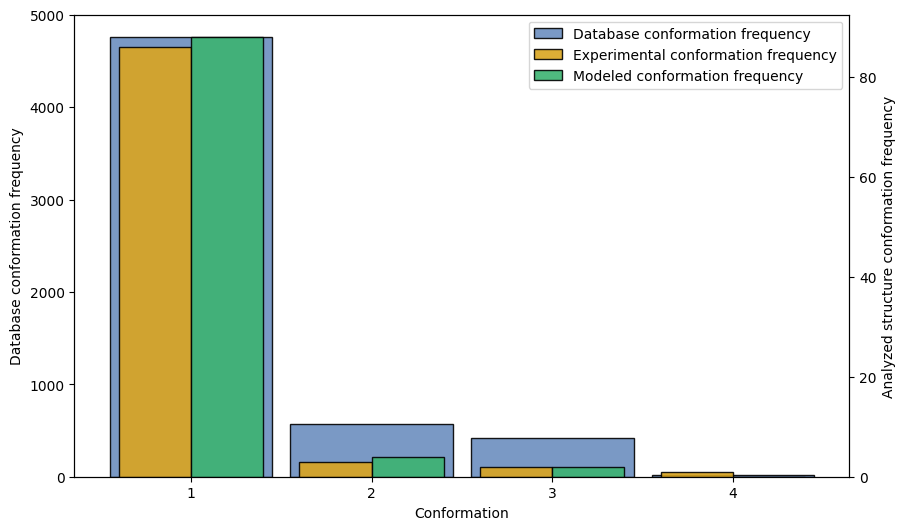

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[63, 21, 31, 23, 42, 15, 26, 61, 8, 39, 9, 23, 15, 3, 5, 49, 114, 57, 2, 28, 58, 3, 9, 4, 4, 3, 32, 2, 40, 35, 40, 2, 11, 40, 2, 10, 10, 3, 7, 3, 11, 5, 32, 2, 34, 2, 2, 5, 8, 3, 1, 36, 53, 9, 92, 17, 5, 19, 4, 5, 8, 9, 13, 9, 3, 32, 1, 11, 2, 4, 98, 19, 15, 1, 2, 1, 2, 4, 5, 12, 4, 2, 1, 14, 21, 3, 6, 3, 8, 12, 6, 14, 16, 2, 17, 17, 11, 48, 29, 10, 40, 14, 32, 1, 2, 7, 8, 3, 10, 11, 4, 22, 20, 2, 7, 11, 7, 4, 2, 5, 16, 1, 2, 3, 7, 6, 21, 12, 14, 2, 1, 4, 1, 5, 7, 2, 11, 2, 1, 7, 3, 3, 2, 3, 2, 25, 7, 5, 9, 2, 11, 1, 1, 1, 2, 4, 3, 1, 1, 7, 10, 1, 2, 15, 1, 5, 3, 1, 3, 2, 7, 10, 1, 6, 2, 5, 1, 1, 1, 2, 1, 23, 4, 8, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 30, 1, 1, 11, 3, 2, 4, 5, 4, 1, 16, 3, 6, 6, 10, 2, 33, 8, 2, 11, 4, 28, 2, 8, 7, 2, 4, 9, 7, 5, 2, 2, 4, 2, 12, 2, 2, 3, 5, 3, 10, 22, 3, 3, 8, 1, 1, 17, 2, 5, 2, 1, 2, 6, 6, 1, 1, 1, 7, 2, 4, 1, 2, 10, 1, 2, 1, 4, 2, 5, 2, 6, 3, 2, 4, 9, 1, 4, 1, 2, 2, 1, 1, 7, 8, 2, 9, 1, 1, 1, 8, 2, 4, 2, 1, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1,

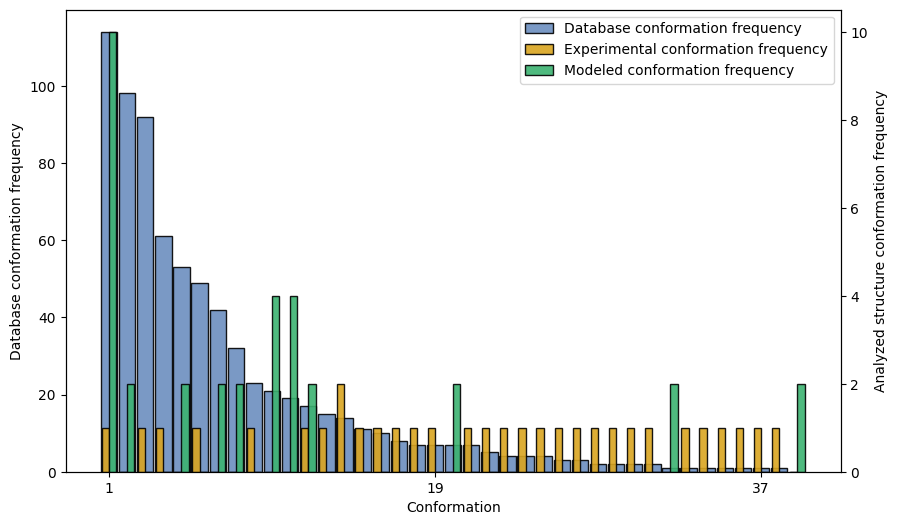

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[84, 637, 73, 105, 292, 49, 172, 102, 244, 42, 88, 3, 102, 116, 138, 56, 4, 40, 96, 35, 63, 54, 34, 28, 4, 20, 31, 7, 12, 38, 16, 10, 36, 2, 3, 11, 7, 35, 23, 19, 1, 2, 2, 2, 9, 42, 47, 1, 3, 2, 5, 4, 3, 19, 1, 4, 7, 2, 1, 3, 31, 11, 2, 7, 1, 8, 1, 1, 4, 1, 2, 3, 6, 1, 5, 7, 4, 5, 3, 1, 1, 4, 1, 4, 2, 2, 4, 1, 1, 1, 2, 2, 1, 2] [84, 643, 74, 107, 303, 49, 175, 102, 244, 42, 88, 3, 102, 118, 139, 58, 4, 40, 96, 35, 63, 54, 34, 28, 4, 20, 32, 7, 12, 39, 16, 10, 36, 2, 3, 11, 7, 35, 23, 20, 1, 2, 2, 2, 9, 42, 47, 1, 3, 2, 5, 4, 3, 22, 1, 4, 9, 2, 1, 3, 31, 11, 2, 7, 1, 8, 1, 1, 4, 1, 2, 3, 6, 1, 5, 7, 5, 6, 3, 1, 1, 4, 1, 4, 2, 2, 4, 1, 1, 1, 2, 2, 1, 2]
[637  73 105 292 172 116 138  56  96  31  38  19  47  19   7   4   5   3] [ 6  1  2 11  3  2  1  2  0  1  1  1  0  3  2  1  1  0] [10  0  0 18  2  2  0  4  2  2  0  0  2  2  0  0  0  2]
Freqüencies de conformacions per a l'aminoàcid ASN d'entre les 94 a la base de dades


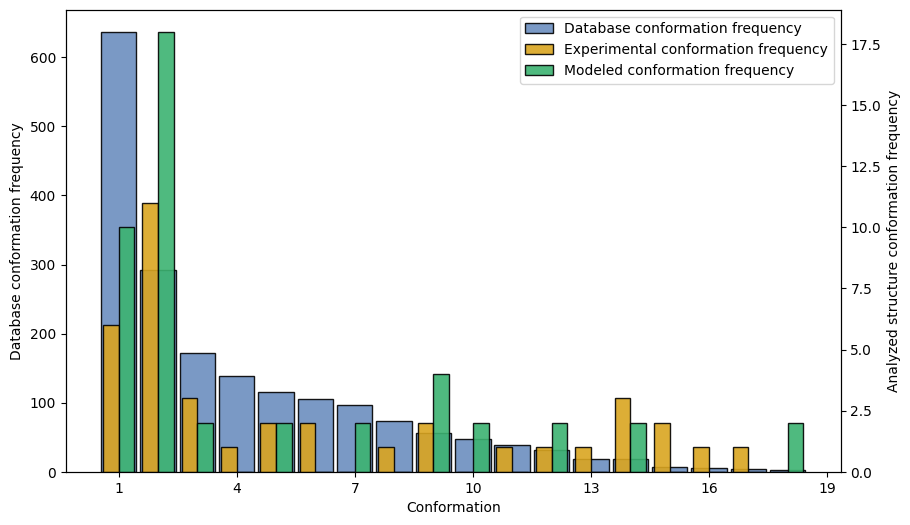

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[1164, 157, 235, 10, 219, 489, 90, 153, 27, 94, 311, 152, 55, 159, 59, 92, 14, 153, 39, 18, 14, 63, 13, 62, 40, 3, 4, 9, 14, 7, 21, 6, 45, 19, 14, 17, 3, 7, 4, 4, 3, 8, 1, 9, 1, 3, 11, 2, 2, 4, 8, 3, 1, 8, 5, 1, 4, 2, 7, 2, 1, 3, 1, 6, 1, 3, 4, 19, 2, 1, 9, 3, 5, 1, 12, 3, 2, 10, 4, 2, 8, 1, 3, 2, 3, 2, 6, 16, 5, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1] [1167, 157, 235, 11, 219, 489, 92, 154, 27, 94, 312, 153, 55, 159, 59, 92, 14, 153, 39, 18, 14, 63, 13, 63, 40, 3, 4, 9, 15, 7, 21, 6, 47, 19, 14, 17, 3, 7, 4, 4, 3, 8, 1, 9, 1, 4, 11, 2, 2, 4, 8, 3, 1, 8, 5, 1, 4, 2, 7, 2, 1, 3, 1, 6, 1, 3, 4, 20, 2, 1, 10, 4, 5, 1, 12, 3, 2, 10, 4, 2, 8, 1, 3, 2, 3, 2, 6, 17, 5, 3, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1]
[1164   10   90  153  311  152   62   14   45   14    3    3   19    9
    3   16    2] [3 1 2 1 1 1 1 1 2 0 1 0 1 1 1 1 1] [12  0  0  4  0  0  0  0  0  2  0  4  0  0  0  0  0]
Freqüencies de conformacions per a l'aminoàcid ASP d'entre l

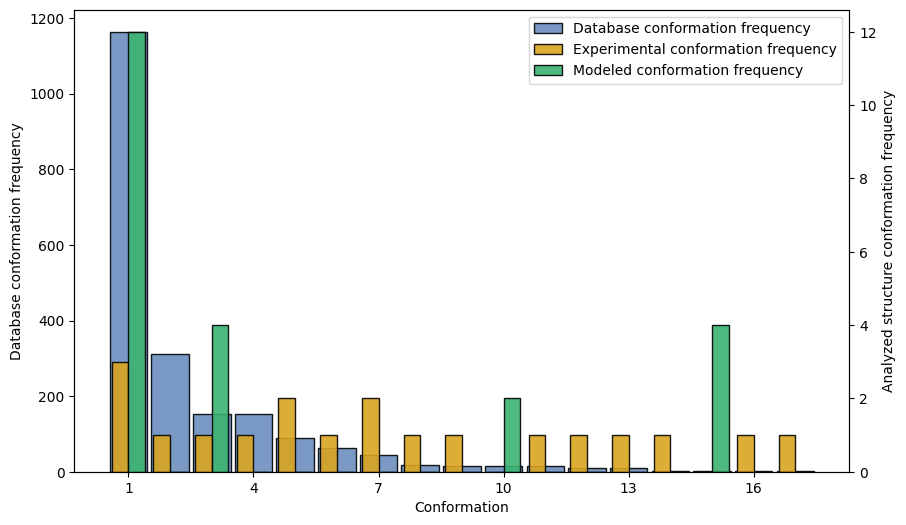

[193, 127, 143, 84, 75, 80, 44, 48, 2, 3, 20, 1, 3, 22, 2, 5, 8, 1, 1, 1, 1, 1] [204, 131, 143, 87, 75, 87, 46, 49, 2, 3, 20, 1, 3, 22, 2, 6, 8, 1, 1, 1, 1, 1]
[193 127 143  84  80  44  48   5] [11  4  0  3  7  2  1  1] [12  8  2  0  6  2  0  0]
Freqüencies de conformacions per a l'aminoàcid CYS d'entre les 22 a la base de dades


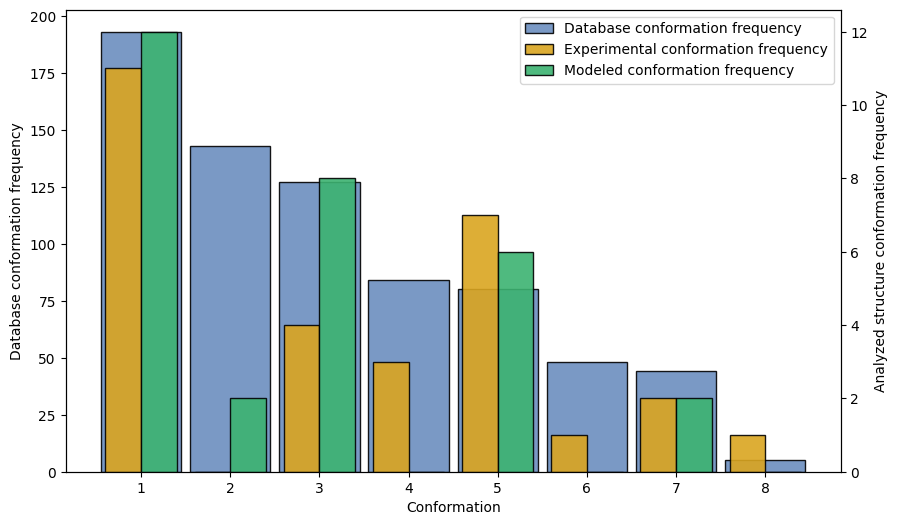

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[231, 151, 94, 120, 15, 6, 37, 16, 77, 20, 59, 159, 33, 26, 77, 49, 29, 29, 60, 43, 35, 31, 1, 30, 21, 14, 10, 18, 1, 9, 8, 53, 3, 12, 28, 4, 4, 19, 21, 22, 18, 5, 9, 10, 9, 15, 7, 13, 4, 9, 26, 11, 22, 14, 7, 46, 10, 5, 2, 3, 21, 8, 18, 17, 4, 9, 3, 12, 5, 16, 3, 31, 26, 9, 15, 1, 1, 4, 6, 1, 2, 2, 1, 6, 1, 4, 4, 13, 3, 1, 10, 4, 5, 2, 21, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 15, 35, 13, 7, 20, 13, 11, 17, 10, 8, 8, 5, 1, 3, 1, 8, 8, 6, 1, 4, 7, 2, 4, 3, 2, 1, 1, 5, 4, 3, 9, 1, 7, 1, 2, 1, 6, 1, 2, 4, 5, 2, 1, 1, 4, 15, 2, 2, 2, 1, 2, 2, 2, 3, 4, 2, 3, 3, 1, 2, 1, 2, 6, 6, 4, 1, 1, 2, 1, 2, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1] [233, 153, 96, 121, 15, 6, 37, 16, 79, 20, 59, 165, 33, 26, 77, 49, 29, 29, 60, 43, 35, 31, 1, 30, 22, 14, 10, 18, 1, 9, 8, 53, 3, 12, 28, 4, 4, 19, 21, 22, 18, 5, 9, 10, 9, 15, 7, 13, 5, 9, 27, 11, 22, 14, 7, 46, 10, 5, 2, 3, 24, 8, 18, 17, 4, 9, 5, 12, 6, 16, 3, 31, 26, 9, 16, 1, 1, 4, 6, 1, 2, 2, 1, 6, 1, 4, 4, 13

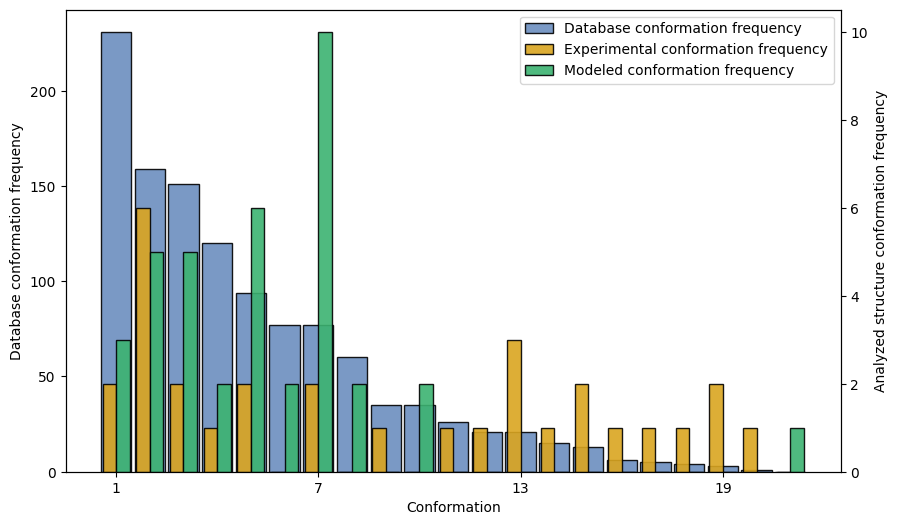

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[195, 331, 115, 68, 6, 98, 125, 137, 42, 33, 23, 47, 287, 260, 59, 44, 119, 21, 22, 13, 20, 47, 30, 2, 27, 15, 84, 8, 35, 33, 9, 78, 40, 106, 15, 35, 40, 16, 1, 11, 26, 20, 8, 8, 8, 217, 16, 7, 48, 7, 2, 10, 9, 4, 4, 2, 16, 34, 4, 10, 2, 24, 19, 6, 25, 8, 31, 21, 18, 47, 1, 10, 4, 12, 2, 55, 10, 24, 7, 2, 16, 7, 3, 5, 19, 7, 3, 18, 8, 3, 11, 4, 8, 2, 2, 2, 1, 2, 16, 4, 4, 12, 2, 17, 5, 2, 5, 4, 1, 1, 2, 3, 1, 2, 3, 1, 7, 2, 9, 2, 5, 3, 2, 2, 1, 2, 4, 1, 1, 1, 9, 11, 4, 1, 2, 1, 1, 3, 2, 5, 1, 3, 1, 2, 1, 1, 2, 3, 1, 1, 4, 2, 1, 1, 6, 3, 1, 3, 14, 1, 1, 3, 5, 1, 1, 1, 2, 7, 1, 3, 3, 1, 16, 7, 7, 9, 3, 8, 3, 5, 14, 3, 3, 6, 10, 7, 33, 2, 1, 2, 1, 1, 6, 1, 5, 2, 2, 2, 2, 3, 2, 3, 1, 6, 4, 1, 6, 5, 5, 1, 3, 1, 1, 3, 1, 7, 3, 1, 6, 12, 2, 2, 2, 1, 2, 2, 3, 8, 2, 3, 2, 1, 2, 1, 1, 2, 3, 6, 4, 6, 1, 2, 9, 5, 1, 3, 2, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 4, 1, 6, 2, 1, 4, 2, 2, 1, 1, 3, 2, 1, 2, 2, 1, 4, 2, 1, 1, 1, 1, 8, 10, 8, 8, 20, 1, 6, 20, 6, 1, 9, 2, 1, 1, 6, 1, 3, 10, 1, 3, 2, 

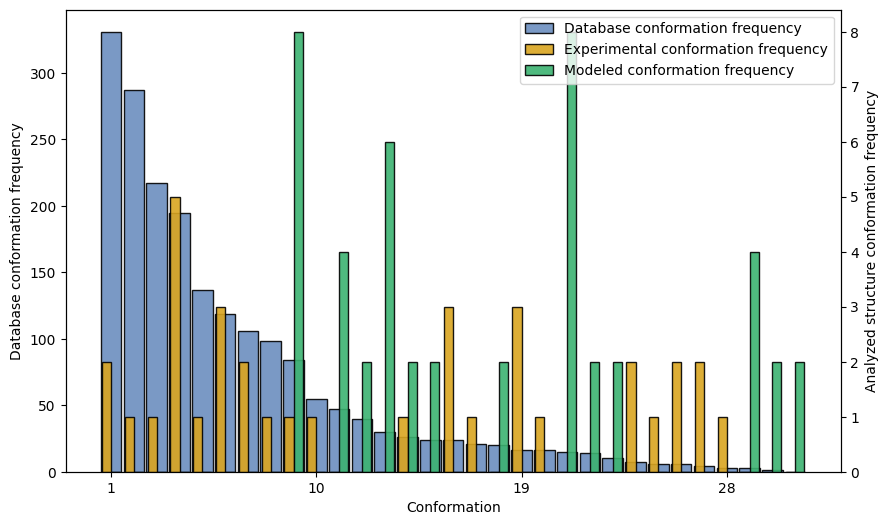

[1414, 2177, 1247, 1033, 43, 30] [1423, 2225, 1258, 1037, 43, 30]
[1414 2177 1247 1033   43] [ 9 48 11  4  0] [13 54  8  4  1]
Freqüencies de conformacions per a l'aminoàcid GLY d'entre les 6 a la base de dades


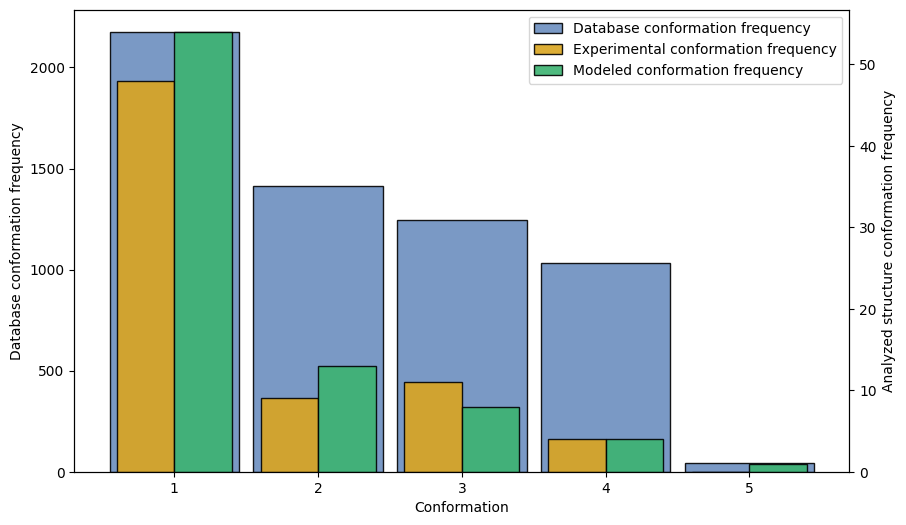

[34, 51, 117, 119, 161, 75, 77, 179, 27, 82, 96, 7, 26, 58, 2, 16, 128, 32, 23, 74, 8, 12, 62, 16, 6, 7, 19, 49, 13, 6, 6, 7, 15, 2, 4, 3, 5, 8, 10, 3, 2, 2, 5, 12, 9, 21, 2, 2, 4, 2, 2, 2, 6, 1, 4, 1, 1, 1, 2, 2, 3, 5, 3, 1, 1, 1, 2, 3] [34, 51, 117, 121, 161, 75, 77, 180, 27, 82, 96, 7, 27, 58, 2, 16, 129, 32, 23, 77, 8, 13, 64, 16, 8, 8, 19, 49, 14, 6, 6, 7, 15, 2, 4, 3, 5, 8, 10, 4, 2, 2, 5, 12, 9, 21, 2, 2, 4, 2, 2, 2, 6, 1, 4, 1, 1, 1, 2, 2, 3, 5, 3, 1, 1, 1, 2, 3]
[119 161 179  27  26 128  74  12  62   6   7  13   3] [2 0 1 0 1 1 3 1 2 2 1 1 1] [2 2 2 2 0 2 2 0 2 2 0 0 0]
Freqüencies de conformacions per a l'aminoàcid HIS d'entre les 68 a la base de dades


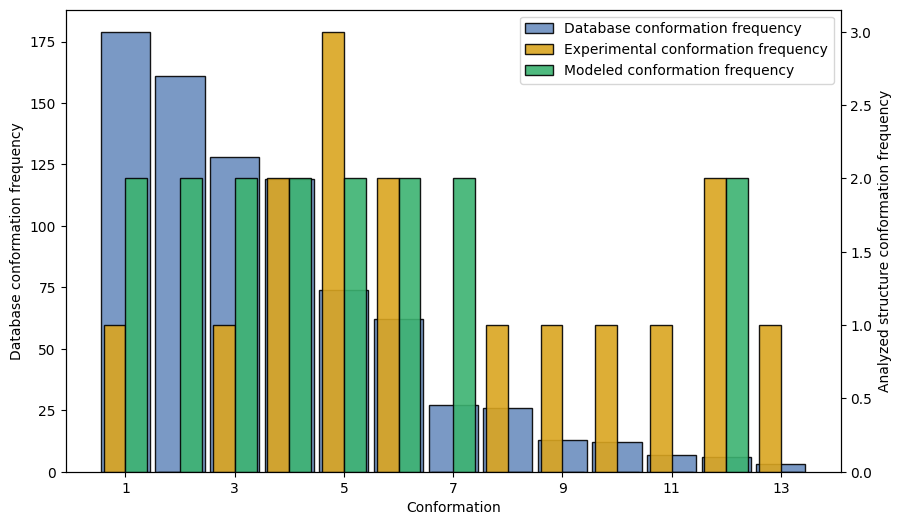

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[1085, 313, 232, 243, 271, 1010, 59, 27, 159, 71, 85, 12, 6, 1, 10, 1, 7, 1, 10, 3, 6, 8, 2, 20, 2, 1, 2, 1, 1, 3, 1, 1, 3, 2, 5, 2] [1125, 314, 253, 248, 272, 1015, 64, 27, 161, 76, 88, 12, 6, 1, 11, 1, 7, 1, 10, 3, 6, 9, 4, 20, 2, 1, 2, 1, 1, 3, 1, 1, 3, 2, 5, 2]
[1085  313  232  243  271 1010   59  159   71   85   10    8    2    0] [40  1 21  5  1  5  5  2  5  3  1  1  2  0] [68  0  8  6  1 14  0  2  0  2  0  0  0  1]
Freqüencies de conformacions per a l'aminoàcid ILE d'entre les 37 a la base de dades


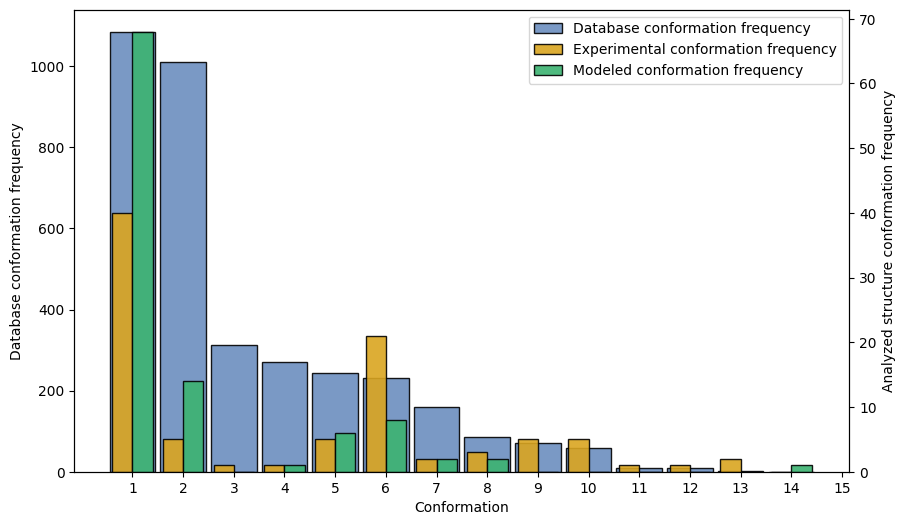

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[2607, 1036, 1561, 107, 46, 728, 67, 19, 65, 55, 44, 39, 12, 22, 9, 18, 60, 74, 13, 29, 1, 16, 15, 2, 29, 25, 33, 89, 2, 10, 2, 6, 22, 26, 7, 1, 23, 35, 2, 17, 56, 58, 17, 2, 15, 14, 18, 21, 4, 94, 4, 11, 6, 3, 3, 3, 6, 10, 1, 1, 10, 1, 2, 3, 8, 2, 7, 24, 40, 36, 6, 6, 2, 8, 7, 13, 13, 1, 8, 9, 9, 7, 12, 19, 5, 4, 3, 4, 3, 9, 5, 3, 3, 6, 4, 2, 14, 2, 10, 3, 3, 3, 3, 4, 4, 5, 1, 6, 3, 1, 7, 4, 5, 1, 5, 4, 2, 8, 1, 1, 3, 2, 3, 2, 4, 2, 2, 5, 1, 4, 1, 4, 1, 2, 2, 2, 2, 1, 2, 1, 2, 3, 3, 1, 1, 1, 1, 2, 1, 1, 5, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 5, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1] [2663, 1062, 1568, 108, 47, 729, 71, 19, 65, 58, 44, 41, 12, 22, 9, 18, 61, 75, 14, 29, 1, 16, 16, 2, 29, 25, 33, 90, 2, 10, 2, 6, 22, 26, 7, 1, 24, 49, 2, 17, 56, 64, 18, 2, 15, 14, 18, 21, 4, 94, 4, 11, 6, 3, 3, 3, 6, 10, 1, 1, 10, 1, 2, 3, 8, 2, 7, 24, 40, 36, 6, 6, 2, 8, 7, 13, 13, 1, 8, 9, 9, 7, 12, 19, 5, 4, 3, 4, 3, 9, 5, 3, 3, 6, 4, 2, 14, 2, 10, 3, 3, 3, 3, 4, 4, 5, 1, 6, 3, 1

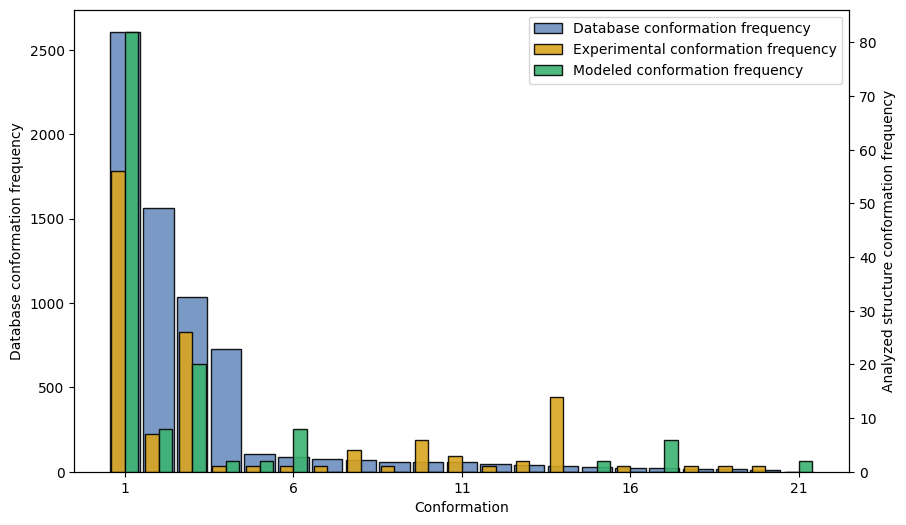

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[198, 258, 202, 67, 76, 45, 250, 59, 34, 35, 68, 23, 14, 26, 46, 41, 60, 54, 4, 35, 31, 12, 16, 12, 15, 22, 26, 41, 21, 29, 1, 2, 2, 9, 9, 158, 26, 13, 1, 30, 2, 52, 4, 9, 7, 6, 9, 18, 8, 2, 6, 4, 7, 109, 19, 11, 12, 22, 28, 18, 1, 11, 19, 12, 8, 14, 1, 5, 7, 5, 4, 48, 15, 2, 43, 5, 3, 3, 9, 12, 13, 3, 12, 28, 5, 9, 2, 1, 2, 1, 3, 7, 8, 4, 8, 3, 12, 2, 3, 6, 1, 6, 3, 2, 2, 7, 3, 5, 5, 28, 1, 2, 1, 2, 6, 10, 1, 3, 5, 3, 3, 1, 6, 4, 3, 6, 4, 3, 1, 3, 1, 4, 1, 1, 3, 2, 3, 4, 2, 1, 1, 1, 7, 1, 4, 1, 1, 3, 5, 1, 7, 1, 7, 1, 4, 1, 2, 1, 3, 1, 2, 1, 3, 3, 2, 2, 2, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 7, 3, 2, 1, 2, 1, 1, 1, 2, 3, 7, 3, 3, 1, 1, 7, 2, 6, 1, 1, 1, 3, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 4, 3, 1, 2, 1, 1, 2, 2, 3, 1, 3, 1, 1, 2, 1, 6, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 18, 24, 4, 2, 1, 6, 3, 3, 11, 1, 14, 3, 1, 3, 8, 1, 2, 1, 2, 3, 3, 1, 1, 3, 2, 4, 2, 2, 1, 1, 1, 4, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 8, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 3, 5, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 

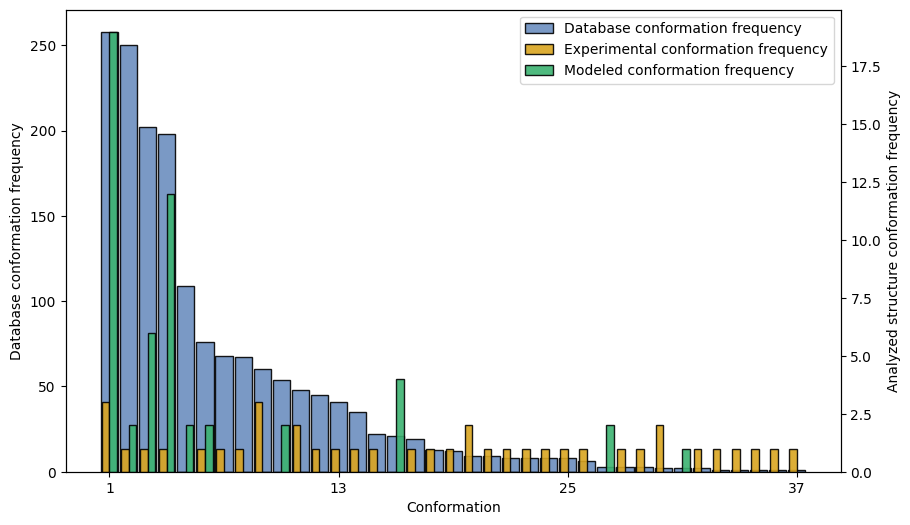

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[128, 156, 40, 99, 57, 18, 12, 129, 13, 39, 53, 63, 51, 12, 92, 24, 16, 12, 7, 7, 1, 21, 123, 12, 2, 24, 27, 43, 2, 21, 11, 13, 21, 6, 7, 27, 16, 12, 6, 21, 2, 1, 7, 1, 3, 8, 5, 36, 1, 6, 8, 14, 7, 2, 3, 3, 1, 8, 1, 3, 2, 1, 1, 14, 3, 4, 3, 5, 27, 8, 8, 4, 18, 1, 4, 1, 4, 10, 4, 2, 3, 1, 7, 3, 5, 1, 12, 1, 1, 1, 1, 1, 2, 6, 1, 1, 1, 2, 11, 5, 2, 4, 2, 2, 2, 1, 2, 7, 5, 1, 13, 1, 17, 2, 18, 1, 2, 1, 1, 1, 2, 1, 6, 23, 4, 7, 1, 2, 2, 1, 1, 1, 2, 4, 38, 9, 3, 8, 31, 1, 9, 8, 13, 10, 1, 2, 7, 15, 7, 21, 9, 7, 3, 1, 4, 4, 2, 1, 8, 6, 16, 12, 3, 4, 6, 1, 1, 5, 1, 2, 3, 2, 1, 6, 3, 2, 3, 4, 4, 5, 2, 7, 4, 2, 6, 4, 5, 3, 1, 1, 5, 2, 1, 6, 8, 3, 1, 1, 1, 5, 1, 1, 4, 2, 1, 7, 2, 1, 2, 3, 1, 1, 3, 2, 1, 1, 5, 1, 2, 3, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1] [128, 159, 40

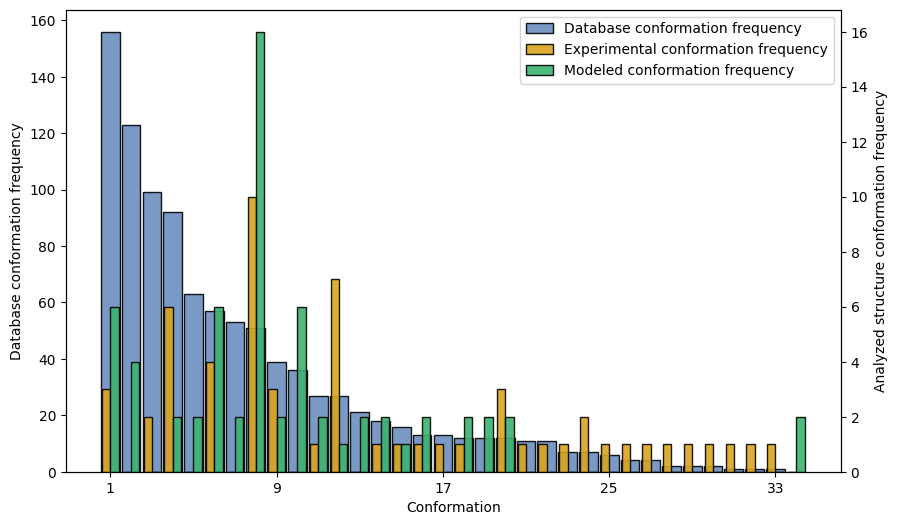

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[463, 76, 225, 493, 95, 124, 143, 107, 42, 491, 104, 119, 85, 119, 35, 2, 31, 5, 8, 2, 15, 56, 24, 29, 62, 2, 5, 14, 45, 7, 29, 10, 5, 38, 3, 1, 4, 2, 2, 2, 3, 10, 7, 2, 6, 8, 2, 4, 1, 3, 2, 2, 3, 2, 1, 2, 2, 1, 1, 2, 5, 19, 4, 12, 11, 26, 18, 23, 1, 5, 6, 3, 4, 3, 3, 2, 3, 2, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1] [477, 76, 225, 495, 98, 125, 145, 111, 43, 517, 104, 124, 87, 119, 35, 2, 34, 5, 8, 2, 15, 57, 24, 29, 62, 2, 5, 14, 46, 8, 29, 10, 5, 38, 3, 1, 4, 2, 2, 2, 3, 10, 7, 2, 6, 10, 2, 4, 1, 3, 2, 2, 3, 2, 1, 2, 2, 1, 1, 2, 5, 19, 4, 12, 11, 26, 18, 23, 1, 5, 6, 3, 4, 3, 3, 2, 3, 2, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1]
[463  76 493  95 124 143 107  42 491 104 119  85  31  56  45   7  10   2
   8] [14  0  2  3  1  2  4  1 26  0  5  2  3  1  1  1  0  0  2] [16  2  2  0  0  0  0  4  0  2  6  6  0  4  0  0 24  2  0]
Freqüencies de conformacions per a l'aminoàcid PHE d'entre les 89 a la base de dades


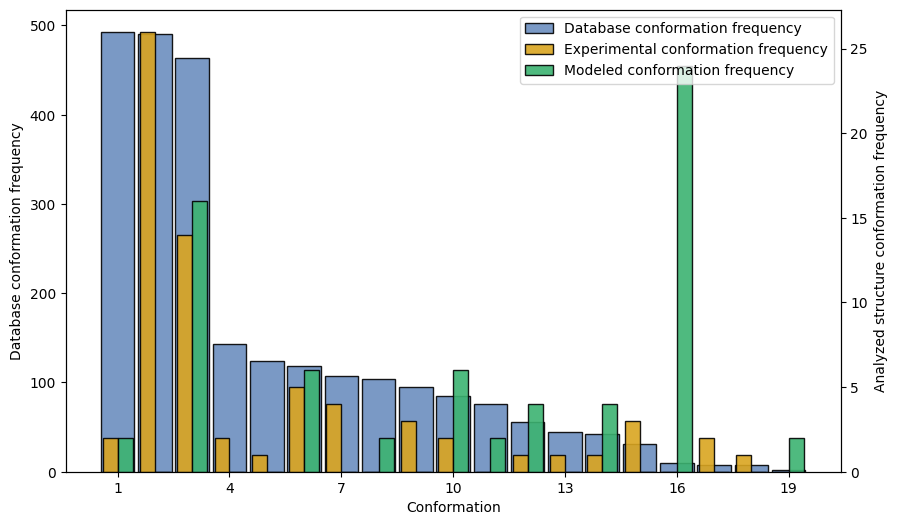

[801, 844, 1141, 895, 53, 10, 3, 2, 1, 4] [808, 874, 1161, 903, 53, 11, 3, 2, 1, 4]
[ 801  844 1141  895   53   10] [ 7 30 20  8  0  1] [ 8 30  4 34  2  0]
Freqüencies de conformacions per a l'aminoàcid PRO d'entre les 10 a la base de dades


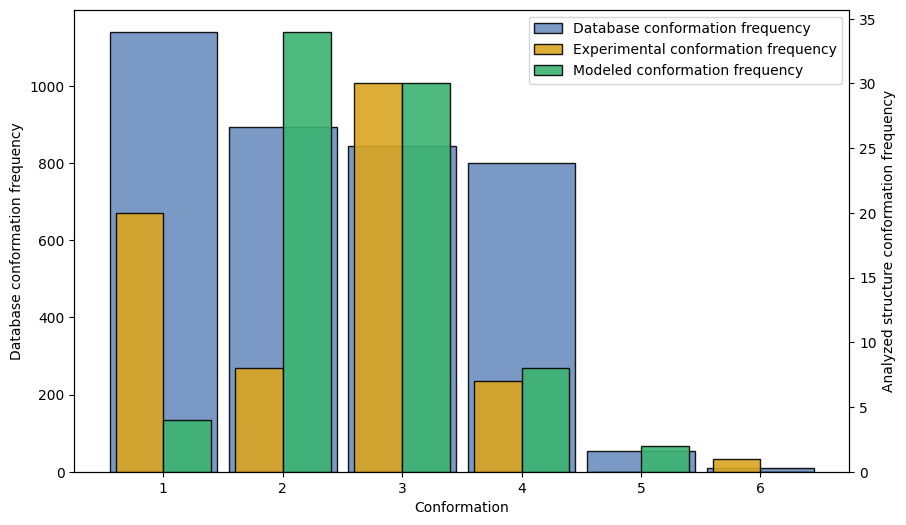

[959, 386, 813, 235, 47, 89, 368, 487, 312, 123, 37, 26, 7, 46, 1, 4, 3, 3, 20, 4, 1, 1, 1, 2, 2, 1, 1, 1, 6, 1, 1] [965, 389, 823, 244, 47, 89, 374, 489, 324, 123, 37, 26, 7, 46, 1, 4, 3, 3, 20, 6, 1, 1, 1, 2, 2, 1, 1, 1, 6, 1, 1]
[959 386 813 235  89 368 487 312   4] [ 6  3 10  9  0  6  2 12  2] [18  4 14  4  2  0  4  6  0]
Freqüencies de conformacions per a l'aminoàcid SER d'entre les 31 a la base de dades


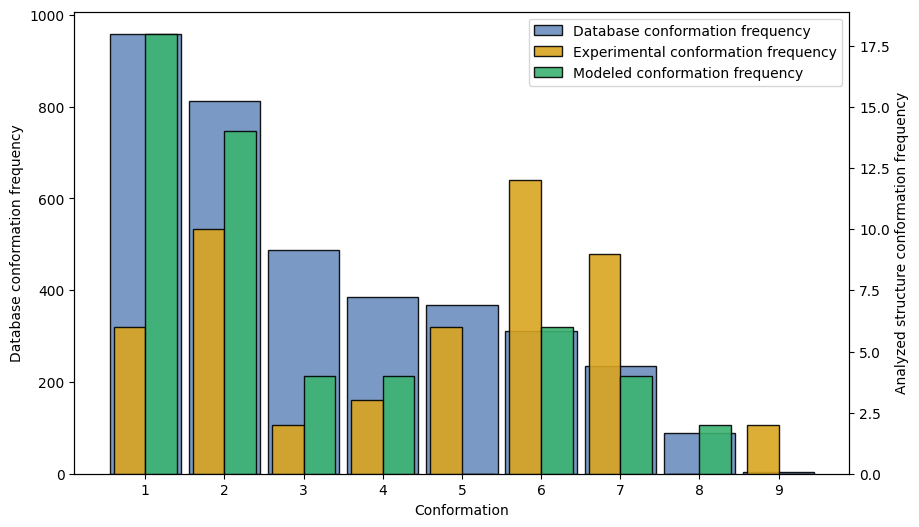

[1053, 1054, 1135, 1135, 277, 63, 19, 35, 16, 2, 6, 4, 2, 1, 4, 4, 10, 1, 2, 2, 2, 1, 1, 2, 2, 1] [1057, 1060, 1166, 1137, 282, 66, 21, 41, 16, 2, 6, 4, 2, 1, 4, 5, 10, 1, 2, 2, 2, 1, 1, 2, 2, 1]
[1053 1054 1135 1135  277   63   19   35    4    4    0] [ 4  6 31  2  5  3  2  6  0  1  0] [10 12 29  2  0  9  4  2  1  0  1]
Freqüencies de conformacions per a l'aminoàcid THR d'entre les 27 a la base de dades


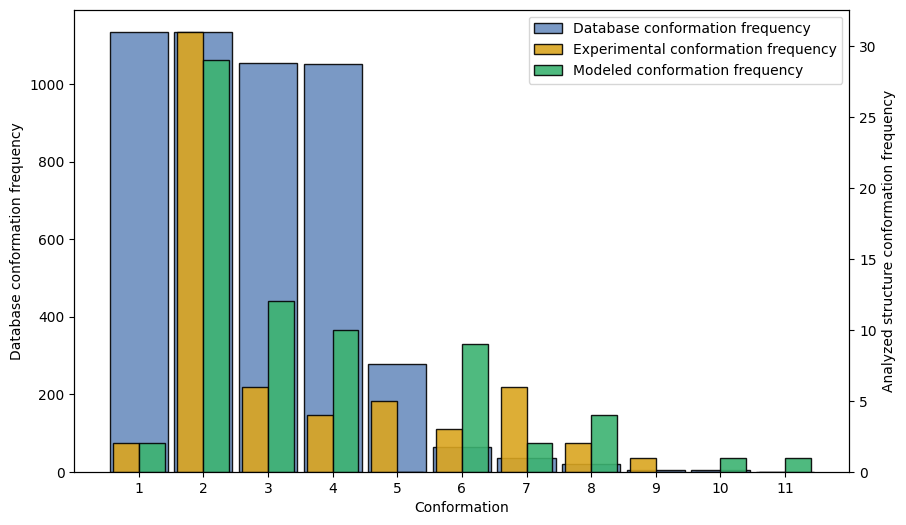

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[78, 73, 67, 41, 161, 101, 177, 73, 86, 80, 12, 29, 15, 18, 7, 40, 8, 11, 13, 6, 27, 2, 4, 7, 7, 2, 4, 24, 14, 14, 7, 1, 14, 2, 4, 2, 5, 3, 2, 4] [80, 73, 67, 41, 164, 104, 178, 76, 91, 80, 12, 29, 15, 18, 7, 40, 8, 11, 13, 6, 28, 2, 4, 7, 7, 2, 4, 24, 16, 14, 7, 1, 14, 2, 4, 2, 5, 3, 2, 4]
[ 78 161 101 177  73  86  13  27  14] [2 3 3 1 3 5 0 1 2] [2 4 2 0 4 6 2 0 0]
Freqüencies de conformacions per a l'aminoàcid TRP d'entre les 40 a la base de dades


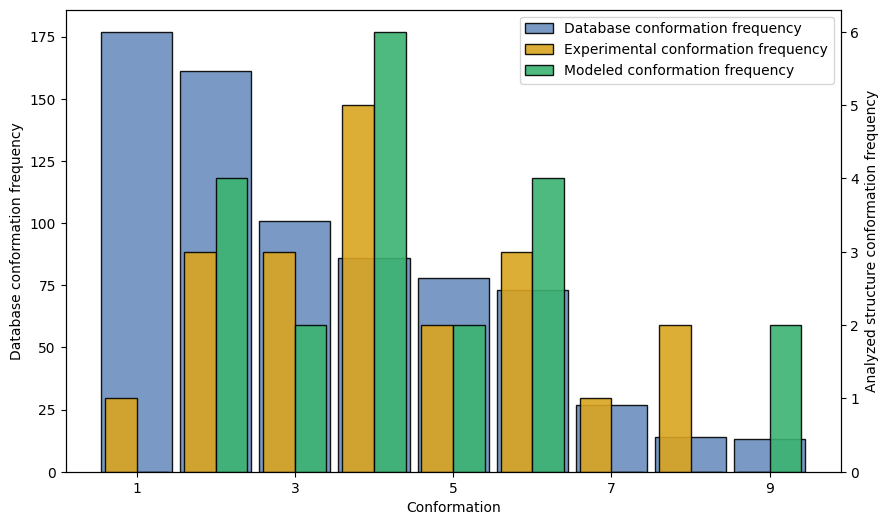

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[515, 288, 10, 104, 121, 103, 66, 319, 572, 90, 69, 179, 19, 33, 11, 5, 9, 30, 34, 14, 77, 4, 32, 13, 4, 24, 3, 35, 8, 6, 5, 10, 15, 8, 4, 2, 3, 7, 1, 8, 1, 7, 1, 3, 3, 2, 1, 15, 11, 11, 1, 2, 6, 1, 1] [523, 288, 10, 104, 121, 103, 70, 327, 575, 93, 74, 179, 19, 33, 11, 5, 9, 30, 34, 14, 77, 4, 32, 14, 6, 25, 3, 36, 8, 6, 5, 10, 16, 8, 4, 2, 4, 7, 1, 8, 1, 7, 1, 3, 3, 2, 1, 15, 11, 11, 1, 2, 6, 1, 1]
[515  66 319 572  90  69  34  77  13   4  24  35  15   3] [8 4 8 3 3 5 0 0 1 2 1 1 1 1] [12  2  0  4 12  4  2  2  2  0  2  0  0  0]
Freqüencies de conformacions per a l'aminoàcid TYR d'entre les 55 a la base de dades


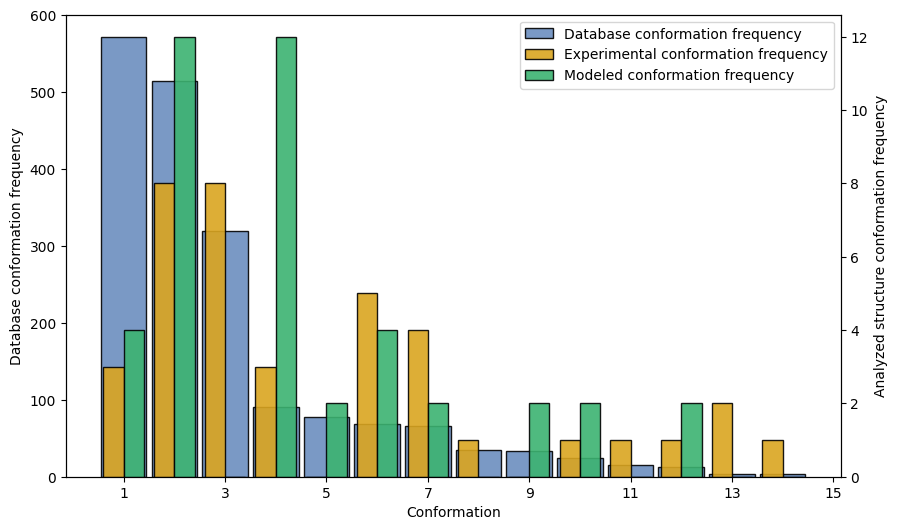

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


[2113, 1809, 18, 533, 144, 290, 238, 9, 17, 15, 9, 9, 12, 2, 1, 9, 3, 52, 2, 6, 22, 2, 1, 18, 14, 3, 1, 4, 1, 5, 1, 3, 5, 3, 1, 2, 1, 1, 1, 1, 1] [2117, 1881, 18, 534, 150, 295, 238, 9, 17, 15, 9, 9, 12, 2, 1, 9, 3, 52, 2, 6, 22, 2, 1, 18, 14, 3, 1, 4, 1, 5, 1, 3, 5, 3, 1, 2, 1, 1, 1, 1, 1]
[2113 1809  533  144  290] [ 4 72  1  6  5] [ 8 78  0  2  4]
Freqüencies de conformacions per a l'aminoàcid VAL d'entre les 41 a la base de dades


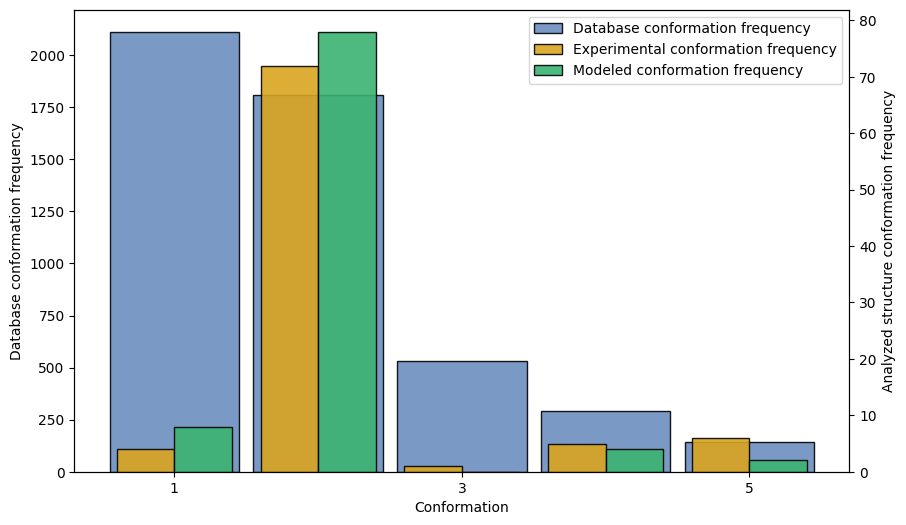

Quin fitxer de proteïna vols analitzar? Escriu break per parar break


In [3]:
extra_name = "side_chains"
while True:
    analized_prote1  = input("Quin fitxer de proteïna vols analitzar? Escriu break per parar")
    
    if analized_prote1 == "break":
        break
        
    analized_prote2  = input("Quin fitxer de proteïna conté el model d'alphafold?")
     
    u1 = mda.Universe(config.source_2+"/"+analized_prote1)
    u2 = mda.Universe(config.source_2+"/"+analized_prote2)
    for i in range(len(aminoacid_ensemble)):
        aminoacid_ensemble[i].open()
        freq_1, freq_2 = aminoacid_ensemble[i].frequencies_vector(u1)
        aminoacid_ensemble[i].open()
        freq_1, freq_3 = aminoacid_ensemble[i].frequencies_vector(u2)
        print(freq_1, freq_2)
        useful_functions.triple_ploter(freq_1, freq_2, freq_3,config.output + "/"+extra_name +os.path.splitext(analized_prote1)[0]+"multiplot", config.aminoacids[i], "pdf",
                                       ploter_show=True, masking = True, ordering = True, title = False) #+os.path.splitext(analized_prote1)[0]



    

In [13]:
import MDAnalysis as mda
import numpy as np

# Load your structure
analized_prote  = input("quin fitxer de proteïna vols analitzar? Escriu break per parar")
u = mda.Universe(config.source_2+"/"+analized_prote)
def chirality(center, a1, a2, a3):
    """Compute scalar triple product"""
    v1 = a1 - center
    v2 = a2 - center
    v3 = a3 - center
    return np.dot(np.cross(v1, v2), v3)

# Iterate through protein residues
for res in u.select_atoms("protein").residues:
    try:
        ca = res.atoms.select_atoms("name CA")[0].position
        n  = res.atoms.select_atoms("name N")[0].position
        c  = res.atoms.select_atoms("name C")[0].position
        cb = res.atoms.select_atoms("name CB")[0].position

        chi = chirality(ca, n, c, cb)

        handedness = "L" if chi > 0 else "D"
        print(f"{res.resname} {res.resid:>4} → {handedness}-chiral (value = {chi:.3f})")
    except IndexError:
        print(f"Skipping residue {res.resname} {res.resid}: missing required atoms")

quin fitxer de proteïna vols analitzar? Escriu break per parar 8ZL3_pred.pdb


MET    1 → L-chiral (value = 2.614)
ALA    2 → L-chiral (value = 2.617)
THR    3 → L-chiral (value = 2.523)
GLU    4 → L-chiral (value = 2.578)
THR    5 → L-chiral (value = 2.485)
THR    6 → L-chiral (value = 2.557)
LYS    7 → L-chiral (value = 2.624)
MET    8 → L-chiral (value = 2.539)
ILE    9 → L-chiral (value = 2.618)
TYR   10 → L-chiral (value = 2.548)
THR   11 → L-chiral (value = 2.601)
PRO   12 → L-chiral (value = 2.678)
PRO   13 → L-chiral (value = 2.639)
PRO   14 → L-chiral (value = 2.613)
LEU   15 → L-chiral (value = 2.587)
ASP   16 → L-chiral (value = 2.477)
ILE   17 → L-chiral (value = 2.500)
LYS   18 → L-chiral (value = 2.538)
MET   19 → L-chiral (value = 2.566)
GLU   20 → L-chiral (value = 2.490)
ILE   21 → L-chiral (value = 2.586)
GLU   22 → L-chiral (value = 2.532)
ILE   23 → L-chiral (value = 2.509)
Skipping residue GLY 24: missing required atoms
GLU   25 → L-chiral (value = 2.587)
GLN   26 → L-chiral (value = 2.485)
PRO   27 → L-chiral (value = 2.618)
GLN   28 → L-chi